In [1]:
from torchvision.transforms import ToTensor

from convolutional_model1 import ConvolutionalModel1
from convolutional_model2 import ConvolutionalModel2
from convolutional_model3 import ConvolutionalModel3
from emotionDetectionDataset import EmotionDetectionDataset
from torch_train import *
from torchvision import transforms

import math

In [2]:
from matplotlib import pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.tight_layout()


def print_precisions_recalls_and_fscores(precision_and_recall, classes):
    header = "{:<25}".format("Class") + "".join("{:<25}".format(key) for key in ['precision', 'recall', 'f1-score'])
    print(header)
    print("-" * len(header))

    for i, cls in enumerate(classes.keys()):
        f1 = 2 * precision_and_recall[i, 0] * precision_and_recall[i, 1] / (
                    precision_and_recall[i, 0] + precision_and_recall[i, 1])
        row_str = "{:<25}".format(classes[cls]) + "".join(
            "{:<25}".format(str(value if not math.isnan(value) else 0.)) for value in
            precision_and_recall[i]) + "{:<25}".format(str(f1 if not math.isnan(f1) else 0.))
        print(row_str)

# PRVI MODEL

In [3]:
ROOT_PATH = 'dataset'
config = {'max_epochs': 5, 'batch_size': 64, 'weight_decay': 0.01, 'lr': 0.001}

TRAIN_VAL_SPLIT = 0.75

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
device

device(type='cpu')

### SVE KLASE

In [5]:
MODEL_SAVE_PATH = './models/model.pth'

In [8]:
transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=ToTensor())

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)
model = ConvolutionalModel1().to(device)

In [7]:
# ucitavanje saveanog modela
model.load_state_dict(torch.load('./models/model.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [8]:
history = train_torch_model(model, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True, model_save_path=MODEL_SAVE_PATH)

Epoch 0, train loss=0.018756559118628502, train accuracy=0.554802154932194
Epoch 0, validation loss=0.018312783911824226, validation accuracy=0.5638846314616135
Epoch 1, train loss=0.018810555338859558, train accuracy=0.5554987924948913
Epoch 1, validation loss=0.017881888896226883, validation accuracy=0.5737773442942734
Epoch 2, train loss=0.018672725185751915, train accuracy=0.5586104402749397
Epoch 2, validation loss=0.018110288307070732, validation accuracy=0.567785983001254
Epoch 3, train loss=0.018695471808314323, train accuracy=0.5580531302247818
Epoch 3, validation loss=0.018121376633644104, validation accuracy=0.570851330639543
Epoch 4, train loss=0.01870189607143402, train accuracy=0.5606074679546721
Epoch 4, validation loss=0.018149353563785553, validation accuracy=0.5740560122613906


In [9]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model, test_data_loader, labels=labels, device=device)

C:\Users\tinaa\PycharmProjects\pythonProject\torch_train.py:124: RuntimeWarning: invalid value encountered in scalar divide
  precision_i = tp_i / (tp_i + fp_i)


Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.49135802469135803      0.4154488517745303       0.4502262443438914       
disgusted                0.0                      0.0                      0.0                      
fearful                  0.3444592790387183       0.251953125              0.2910321489001692       
happy                    0.7988888888888889       0.8105975197294251       0.8047006155567992       
neutral                  0.5106696100073583       0.5628548256285483       0.5354938271604939       
sad                      0.40945861854387056      0.5276663993584603       0.4611072179397337       
surprised                0.6951934349355217       0.7135980746089049       0.7042755344418051       


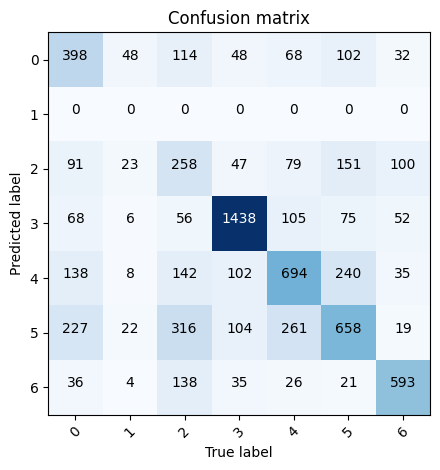

In [10]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)

### BEZ DISGUSTED

In [11]:
MODEL_SAVE_PATH = './models/model_bez_disgusted.pth'

In [12]:
transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

excluded_classes = [1]
train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform, excluded_classes=excluded_classes), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=ToTensor(), excluded_classes=excluded_classes)

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)
model = ConvolutionalModel1().to(device)

In [13]:
# ucitavanje saveanog modela
model.load_state_dict(torch.load('./models/model.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [14]:
history = train_torch_model(model, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True, model_save_path=MODEL_SAVE_PATH)

Epoch 0, train loss=0.018210452049970627, train accuracy=0.5616599858523933
Epoch 0, validation loss=0.017580879852175713, validation accuracy=0.5697509903791738
Epoch 1, train loss=0.01807846873998642, train accuracy=0.5619900966753124
Epoch 1, validation loss=0.017433036118745804, validation accuracy=0.5793718166383701
Epoch 2, train loss=0.018004462122917175, train accuracy=0.564065078990804
Epoch 2, validation loss=0.018760982900857925, validation accuracy=0.5332484436898698
Epoch 3, train loss=0.017915580421686172, train accuracy=0.5698655977363829
Epoch 3, validation loss=0.01743057183921337, validation accuracy=0.5759762308998302
Epoch 4, train loss=0.017872340977191925, train accuracy=0.5674605045979721
Epoch 4, validation loss=0.017565319314599037, validation accuracy=0.572014714204867


In [15]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model, test_data_loader, labels=labels, device=device)

Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.5417236662106704       0.4133611691022965       0.4689165186500888       
fearful                  0.4091858037578288       0.19140625               0.2608117099135063       
happy                    0.6936442615454961       0.855129650507328        0.7659681898510476       
neutral                  0.45654450261780105      0.7072181670721817       0.5548838689150493       
sad                      0.4876543209876543       0.31676022453889335      0.3840544482255713       
surprised                0.6631578947368421       0.7581227436823105       0.7074677147669849       


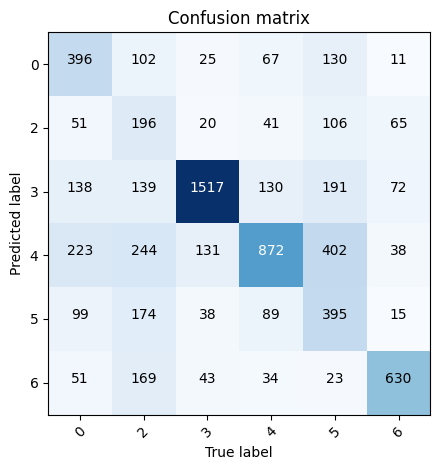

In [16]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)

# DRUGI MODEL

In [17]:
ROOT_PATH = 'dataset'
MODEL_SAVE_PATH = './models/model2.pth'
config = {'max_epochs': 5, 'batch_size': 64, 'weight_decay': 0.06, 'lr': 0.0001}

TRAIN_VAL_SPLIT = 0.8

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=transforms.ToTensor())

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)

model2 = ConvolutionalModel2().to(device)

In [18]:
model2.load_state_dict(torch.load('models/model2.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [19]:
history = train_torch_model(model2, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True,
                            model_save_path=MODEL_SAVE_PATH)

Epoch 0, train loss=0.01676284149289131, train accuracy=0.649294670846395
Epoch 0, validation loss=0.01751323789358139, validation accuracy=0.6117401149625501
Epoch 1, train loss=0.01635790430009365, train accuracy=0.6616597004528039
Epoch 1, validation loss=0.017440635710954666, validation accuracy=0.6093015154154329
Epoch 2, train loss=0.01597443036735058, train accuracy=0.6691048415186346
Epoch 2, validation loss=0.01746227592229843, validation accuracy=0.6079080299599373
Epoch 3, train loss=0.01578235998749733, train accuracy=0.6741118077324973
Epoch 3, validation loss=0.01736602932214737, validation accuracy=0.6105208151889915
Epoch 4, train loss=0.015449252910912037, train accuracy=0.6838645071403692
Epoch 4, validation loss=0.017236201092600822, validation accuracy=0.6153980142832259


In [20]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model2, test_data_loader, labels=labels, device=device)

C:\Users\tinaa\PycharmProjects\pythonProject\torch_train.py:124: RuntimeWarning: invalid value encountered in scalar divide
  precision_i = tp_i / (tp_i + fp_i)


Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.4749582637729549       0.593945720250522        0.5278293135435993       
disgusted                0.0                      0.0                      0.0                      
fearful                  0.5464285714285714       0.1494140625             0.23466257668711654      
happy                    0.78199291856348         0.8714768883878241       0.8243135163956278       
neutral                  0.5400130123617437       0.6731549067315491       0.5992779783393501       
sad                      0.4520865533230294       0.46912590216519645      0.4604486422668241       
surprised                0.7219730941704036       0.7749699157641395       0.7475333720255368       


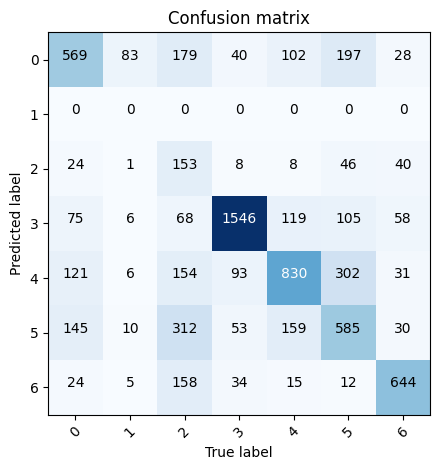

In [21]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)

# TREĆI MODEL

In [9]:
ROOT_PATH = 'dataset'
MODEL_SAVE_PATH = './models/model3.pth'
config = {'max_epochs': 5, 'batch_size': 64, 'weight_decay': 0.01, 'lr': 0.0001}

TRAIN_VAL_SPLIT = 0.8

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=transforms.ToTensor())

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)

model3 = ConvolutionalModel3().to(device)

In [10]:
history = train_torch_model(model3, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True,
                            model_save_path=MODEL_SAVE_PATH)

c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 0, train loss=0.029939867556095123, train accuracy=0.22466039707419017
Epoch 0, validation loss=0.029162690043449402, validation accuracy=0.30081867270510365
Epoch 1, train loss=0.028715526685118675, train accuracy=0.34752699407871823
Epoch 1, validation loss=0.027668964117765427, validation accuracy=0.41264588050862216
Epoch 2, train loss=0.02772645093500614, train accuracy=0.4154040404040404
Epoch 2, validation loss=0.02718566358089447, validation accuracy=0.4499216164431284
Epoch 3, train loss=0.027131615206599236, train accuracy=0.45049634273772204
Epoch 3, validation loss=0.026763075962662697, validation accuracy=0.47622365441560705
Epoch 4, train loss=0.02667524665594101, train accuracy=0.477533960292581
Epoch 4, validation loss=0.026196634396910667, validation accuracy=0.5061835917087616


In [11]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model3, test_data_loader, labels=labels, device=device)

c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to 

c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to 

c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to 

c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to 

Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.4123422159887798       0.3068893528183716       0.3518850987432675       
disgusted                0.0                      0.0                      0.0                      
fearful                  0.23076923076923078      0.005859375              0.011428571428571427     
happy                    0.6517064048620851       0.7857948139797069       0.7124968055200612       
neutral                  0.4064143007360673       0.6269261962692619       0.4931419457735247       
sad                      0.38868205510052123      0.4186046511627907       0.40308880308880307      
surprised                0.5639810426540285       0.7160048134777377       0.6309650053022269       


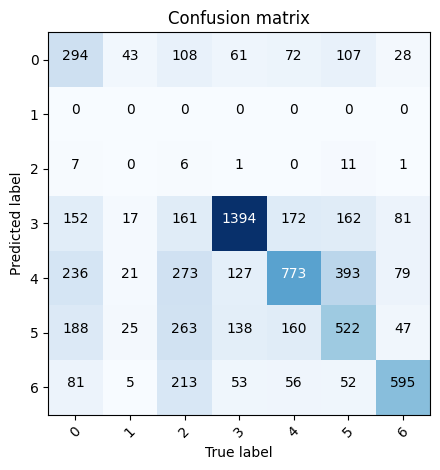

In [12]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)

In [13]:
model3.load_state_dict(torch.load('models/model3.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

### BEZ DISGUSTED

In [14]:
MODEL_SAVE_PATH = './models/model_bez_disgusted2.pth'

In [15]:
transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

excluded_classes = [1]
train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform, excluded_classes=excluded_classes), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=ToTensor(), excluded_classes=excluded_classes)

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)
model = ConvolutionalModel3().to(device)

In [16]:
model.load_state_dict(torch.load('./models/model3.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [17]:
history = train_torch_model(model, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True, model_save_path=MODEL_SAVE_PATH)

c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 0, train loss=0.026287663727998734, train accuracy=0.5051063265396348
Epoch 0, validation loss=0.026462018489837646, validation accuracy=0.48850371418464805
Epoch 1, train loss=0.02603493072092533, train accuracy=0.5181484592599143
Epoch 1, validation loss=0.026377666741609573, validation accuracy=0.5077821011673151
Epoch 2, train loss=0.025763733312487602, train accuracy=0.5373800786949026
Epoch 2, validation loss=0.02595299854874611, validation accuracy=0.5263530244074991
Epoch 3, train loss=0.025605058297514915, train accuracy=0.5457358857597595
Epoch 3, validation loss=0.025632770732045174, validation accuracy=0.5458082773257871
Epoch 4, train loss=0.025496672838926315, train accuracy=0.5522348468102038
Epoch 4, validation loss=0.025917358696460724, validation accuracy=0.5270604881499823


In [18]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model, test_data_loader, labels=labels, device=device)

c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to 

c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to 

c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to 

c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\users\tinaa\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to 

Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.45860566448801743      0.4394572025052192       0.4488272921108742       
fearful                  0.0                      0.0                      0.0                      
happy                    0.741424802110818        0.7919954904171365       0.765876260561461        
neutral                  0.4213547646383467       0.5952960259529603       0.4934453781512605       
sad                      0.38676148796498905      0.5669607056936647       0.45983739837398374      
surprised                0.7510980966325037       0.6173285198555957       0.6776750330250991       


C:\Users\tinaa\AppData\Local\Temp\ipykernel_24260\646338523.py:29: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * precision_and_recall[i, 0] * precision_and_recall[i, 1] / (


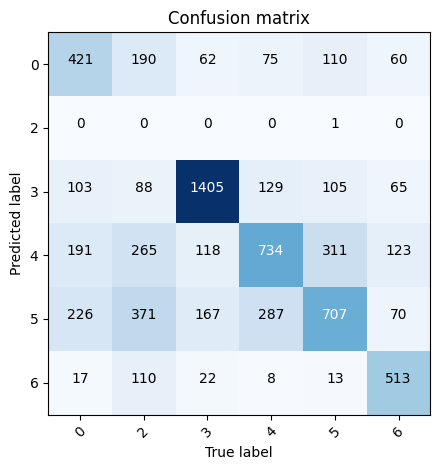

In [19]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)